#IMPORTING THE LIBRARY

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats
from scipy.stats import pearsonr
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [17]:
#Importing The Data
df = pd.read_csv('F:\Data Science\First Semister\Python For Data Science\Assignment\loan_data.csv')

In [18]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [19]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

#DATA CLEANING IF NECESSARY 

In [21]:
 df.isnull()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9574,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9575,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9576,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df[df.isnull().any(axis=1)]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


In [23]:
null_counts_per_column = df.isnull().sum()
print("NULL Value Counts:")
print(null_counts_per_column)

NULL Value Counts:
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [24]:
#EXPLORATORY DATA ANALYSIS (EDA)

In [25]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#DATA VISUALIZATION

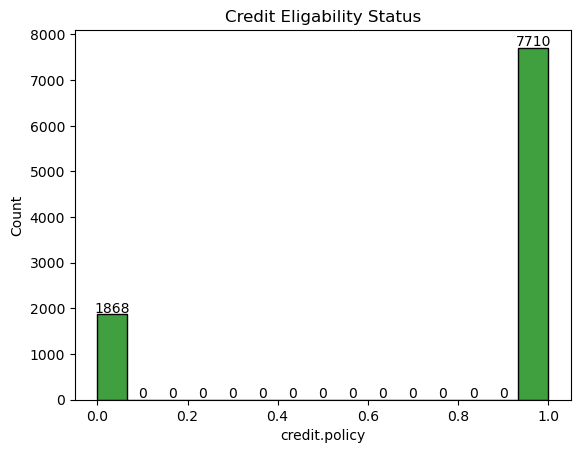

In [27]:
sns.histplot(df['credit.policy'], color='green', edgecolor='black')
plt.title('Credit Eligability Status')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
#plt.savefig('F:\\Data Science\\First Semister\\Python For Data Science\\Assignment\\Figure\\Credit Eligability Status')
plt.show()


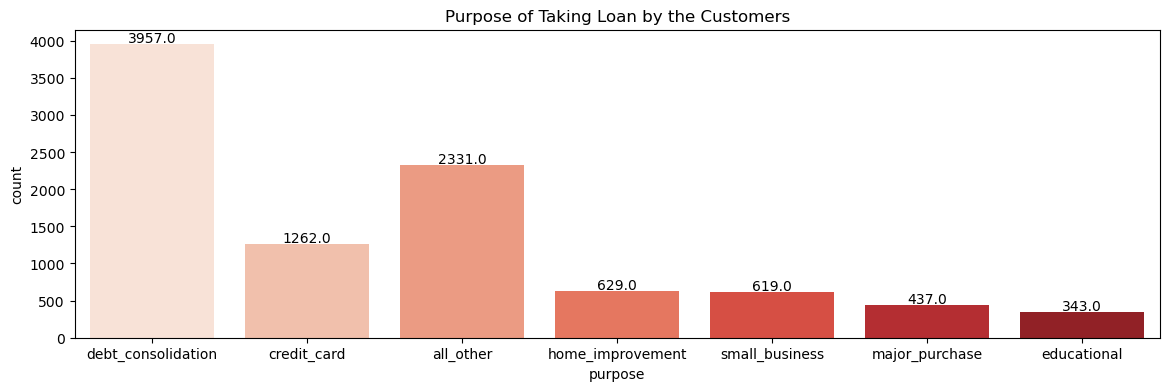

In [28]:
plt.figure(figsize=(14,4))
sns.countplot(x="purpose",data=df, palette="Reds")
plt.title('Purpose of Taking Loan by the Customers')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#plt.savefig('F:\\Data Science\\First Semister\\Python For Data Science\\Assignment\\Figure\\Purpose of Taking Loan by the Customers.jpg')
plt.show()

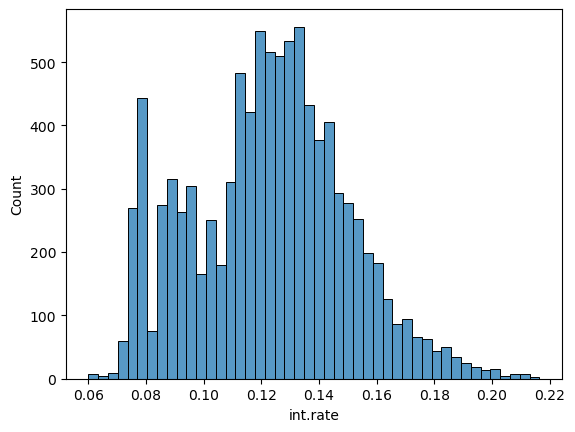

0.16441991354447316


In [29]:
sns.histplot(df['int.rate'])
#plt.savefig('F:\\Data Science\\First Semister\\Python For Data Science\\Assignment\\Figure\\Interest Rate.jpg')
plt.show()
print(df['int.rate'].skew())

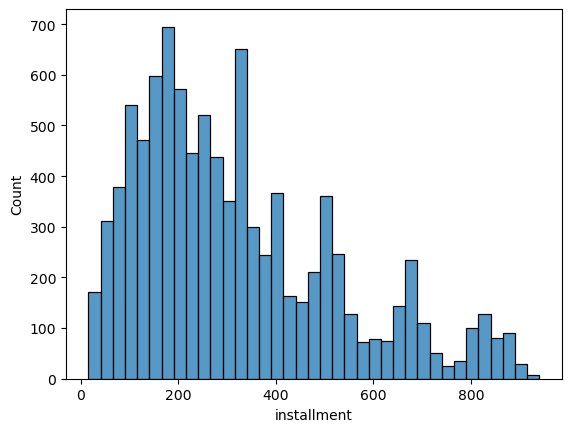

0.9125224624010233


In [30]:
sns.histplot(df['installment'])
plt.show()
print(df['installment'].skew())

In [31]:
print(f"Maximum interest rate: {df['int.rate'].max()}")
print(f"Average interest rate: {df['int.rate'].mean()}")
print(f"Minimum interest rate: {df['int.rate'].min()}")


Maximum interest rate: 0.2164
Average interest rate: 0.12264006055543955
Minimum interest rate: 0.06


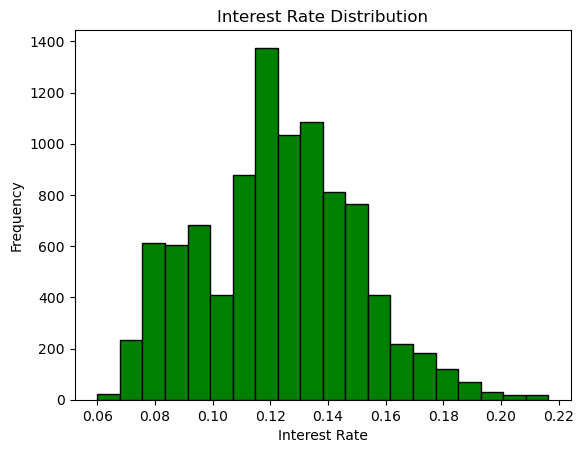

In [32]:
plt.hist(df['int.rate'], bins=20, color='green', edgecolor='black')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
#plt.savefig('F:\\Data Science\\First Semister\\Python For Data Science\\Assignment\\Figure\\Interest Rate Distribution.jpg')
plt.show()

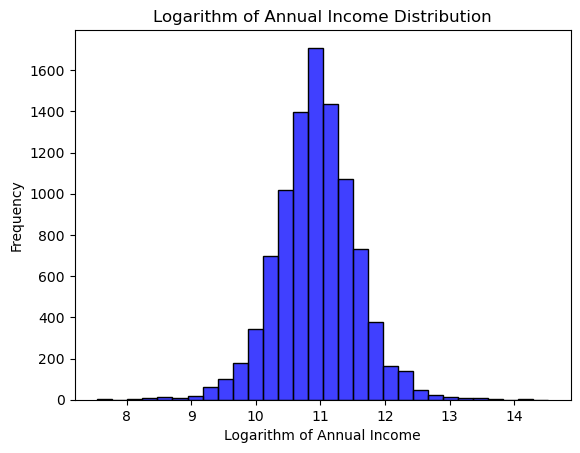

0.028668106570220064


In [33]:
sns.histplot(df['log.annual.inc'], bins=30, color='Blue', edgecolor='black')
plt.title('Logarithm of Annual Income Distribution')
plt.xlabel('Logarithm of Annual Income')
plt.ylabel('Frequency')
#plt.savefig('F:\\Data Science\\First Semister\\Python For Data Science\\Assignment\\Figure\\Logarithm of Annual Income Distribution.jpg')
plt.show()
print(df['log.annual.inc'].skew())

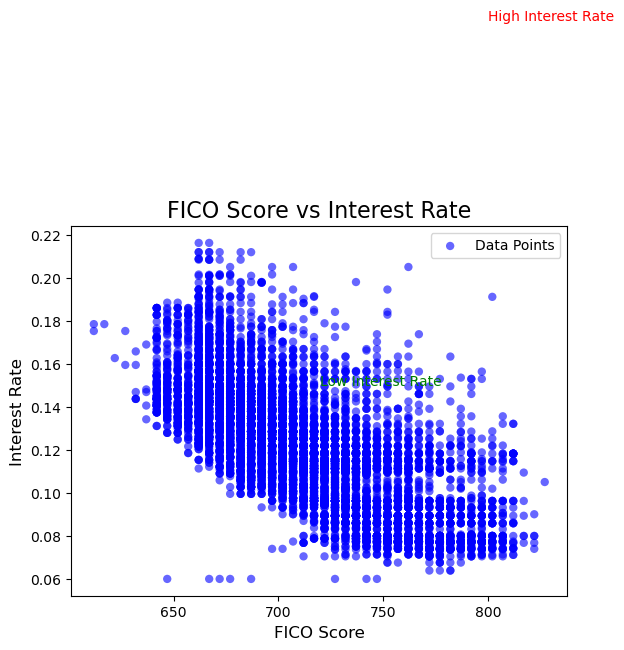

In [34]:
plt.scatter(df['fico'], df['int.rate'], c='blue', alpha=0.6, edgecolors='none', label='Data Points')

plt.title('FICO Score vs Interest Rate', fontsize=16)
plt.xlabel('FICO Score', fontsize=12)
plt.ylabel('Interest Rate', fontsize=12)

plt.text(720, 0.15, 'Low Interest Rate', fontsize=10, color='green')
plt.text(800, 0.32, 'High Interest Rate', fontsize=10, color='red')

plt.legend(loc='upper right')

#plt.savefig('F:\\Data Science\\First Semister\\Python For Data Science\\Assignment\\Figure\\Fico score vs interest rate.jpg')
plt.show()


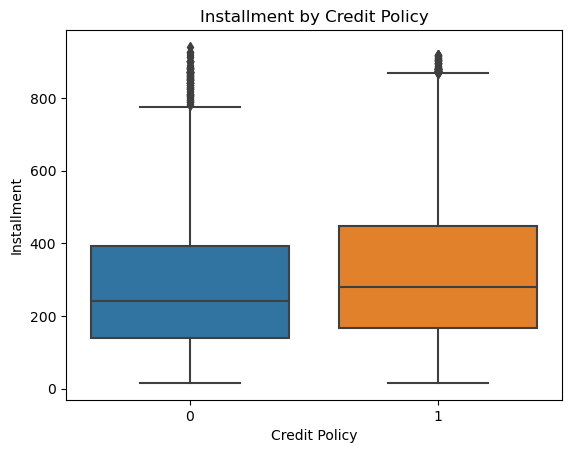

In [35]:
sns.boxplot(x='credit.policy', y='installment', data=df)
plt.title('Installment by Credit Policy')
plt.xlabel('Credit Policy')
plt.ylabel('Installment')

plt.show()

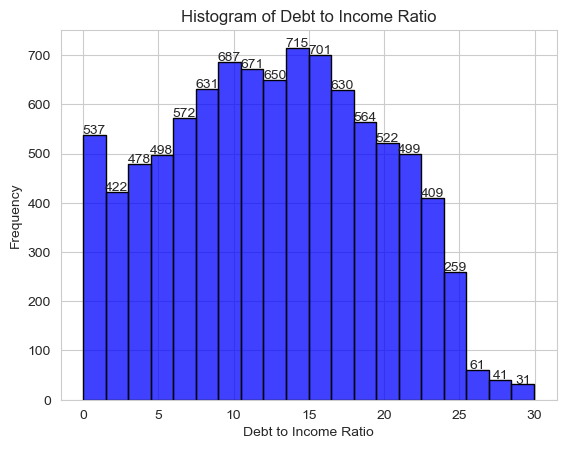

0.023941022949340144


In [37]:
sns.histplot(df['dti'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Frequency')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
#plt.savefig('F:\\Data Science\\First Semister\\Python For Data Science\\Assignment\\Figure\\Debt to Income Ratio.jpg')
plt.show()
print(df['dti'].skew())

In [38]:
print(f"Maximum Debt to income Ratio : {df['dti'].max()}")
print(f"Average Debt to income Ratio : {df['dti'].mean()}")
print(f"Minimum Debt to income Ratio : {df['dti'].min()}")

Maximum Debt to income Ratio : 29.96
Average Debt to income Ratio : 12.60667884735853
Minimum Debt to income Ratio : 0.0


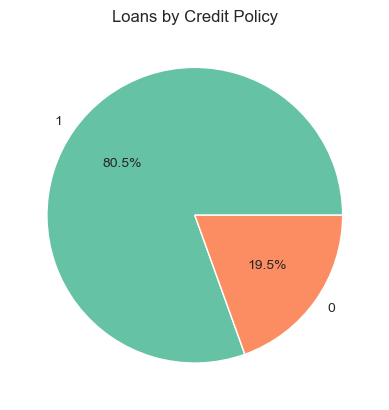

In [39]:
df['credit.policy'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Loans by Credit Policy')
plt.ylabel('')
plt.show()

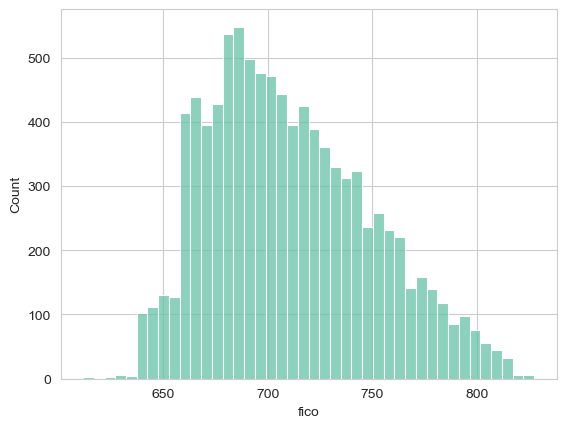

0.4712597399323796


In [40]:
sns.histplot(df['fico'])
plt.show()
print(df['fico'].skew())

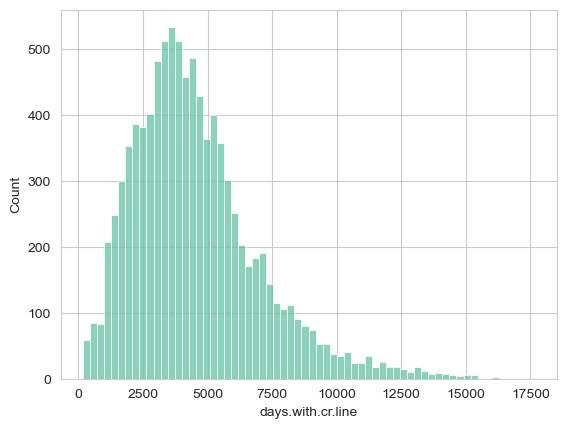

1.1557482270969546


In [41]:
sns.histplot(df['days.with.cr.line'])
plt.show()
print(df['days.with.cr.line'].skew())

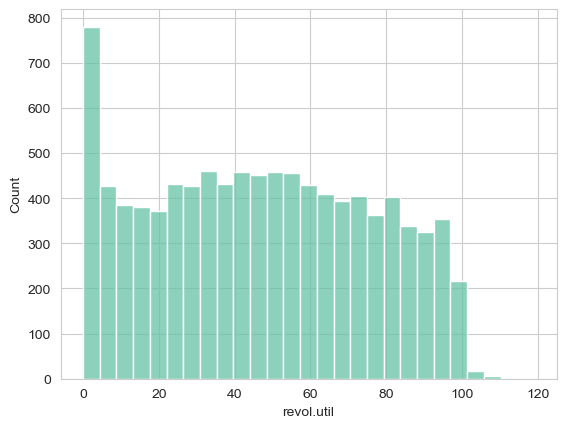

0.05998544258288086


In [42]:
sns.histplot(df['revol.util'])
plt.show()
print(df['revol.util'].skew())

In [43]:
label_encoder = LabelEncoder()

df['purpose'] = label_encoder.fit_transform(df['purpose'])

(df)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


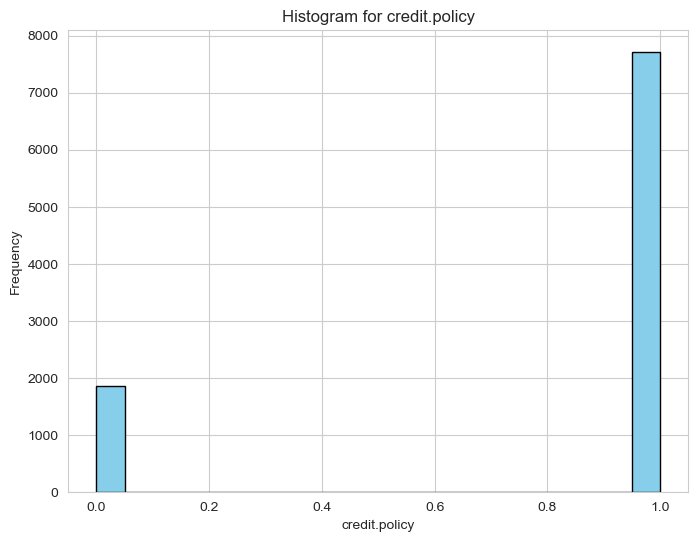

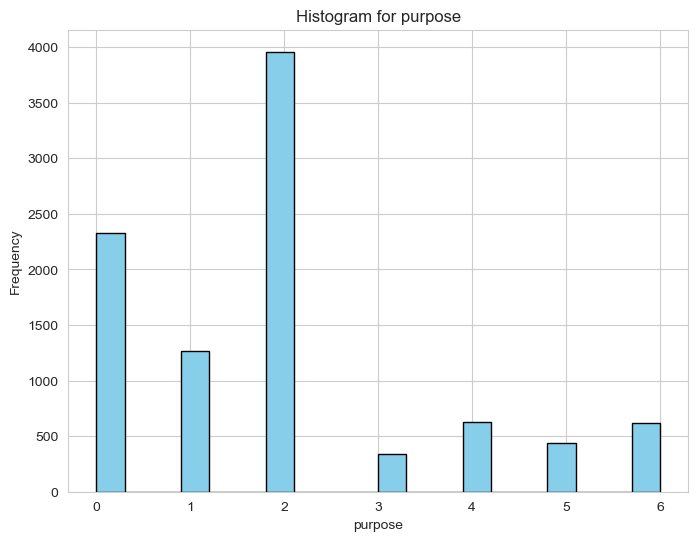

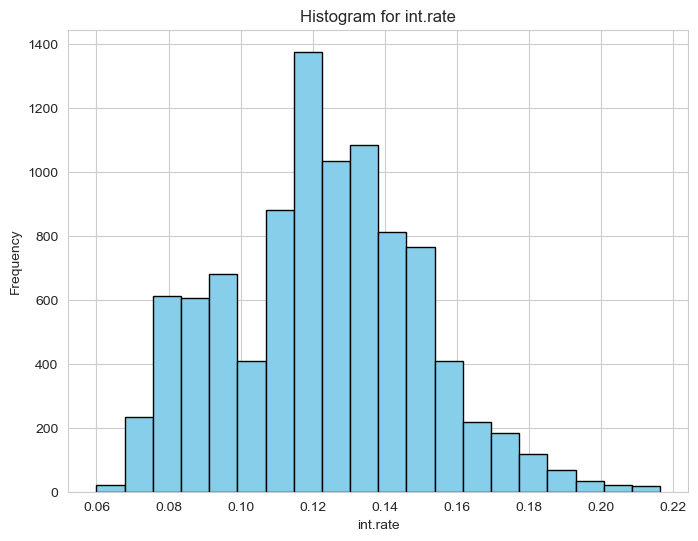

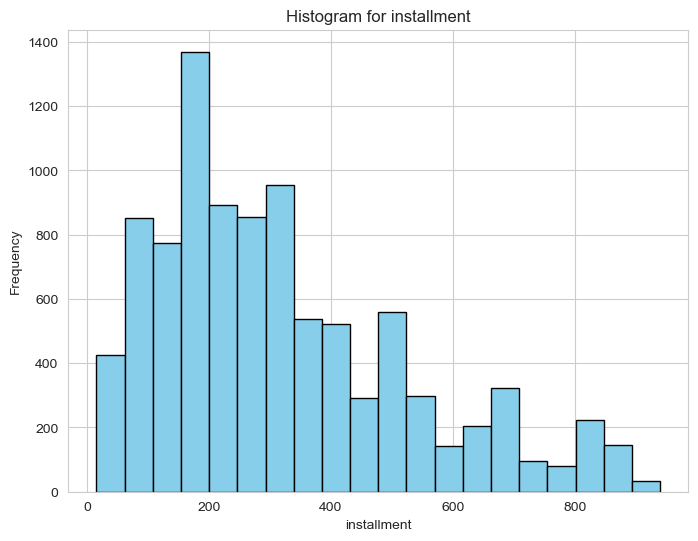

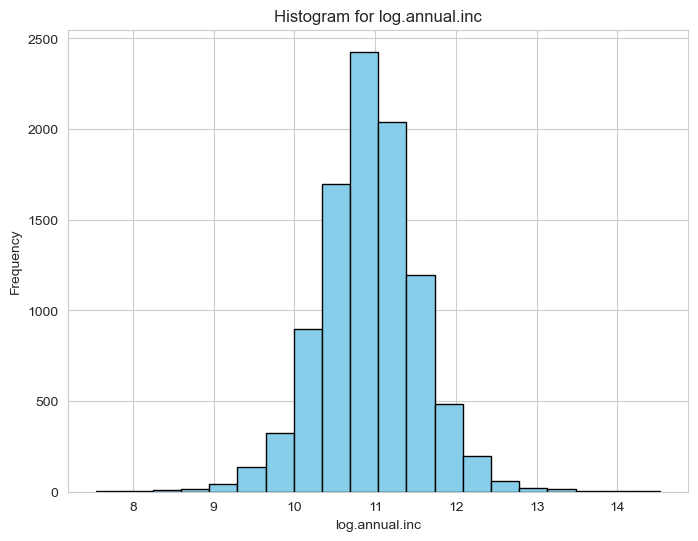

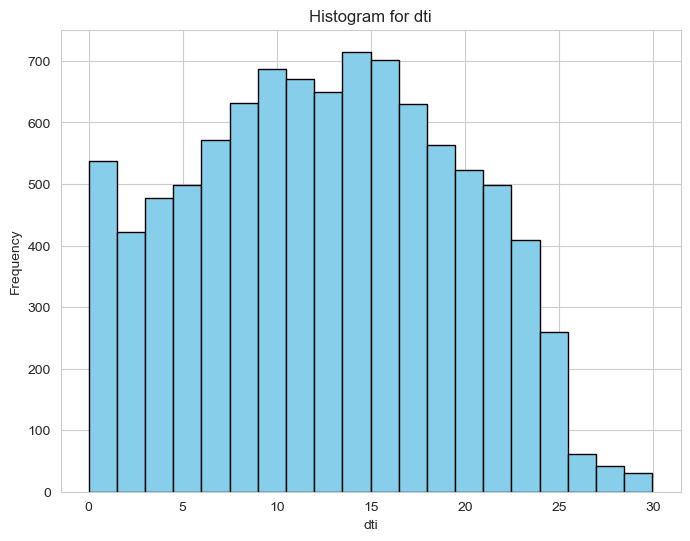

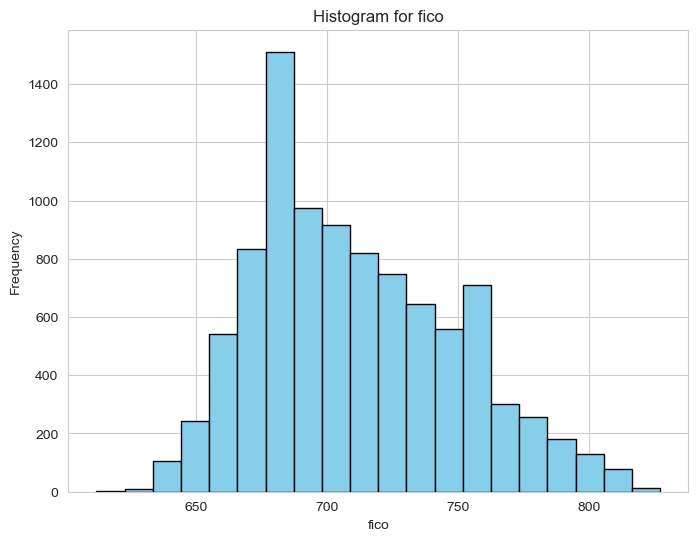

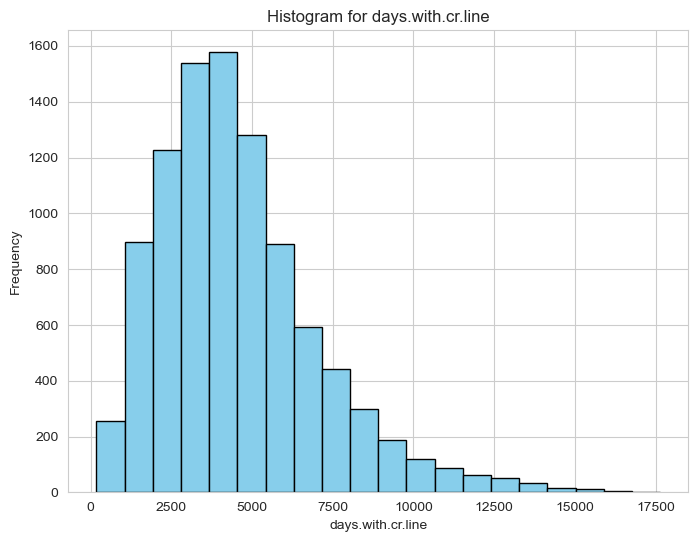

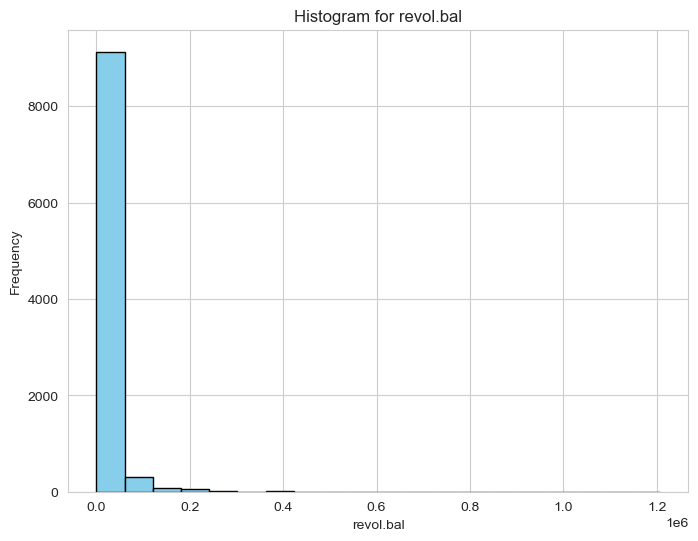

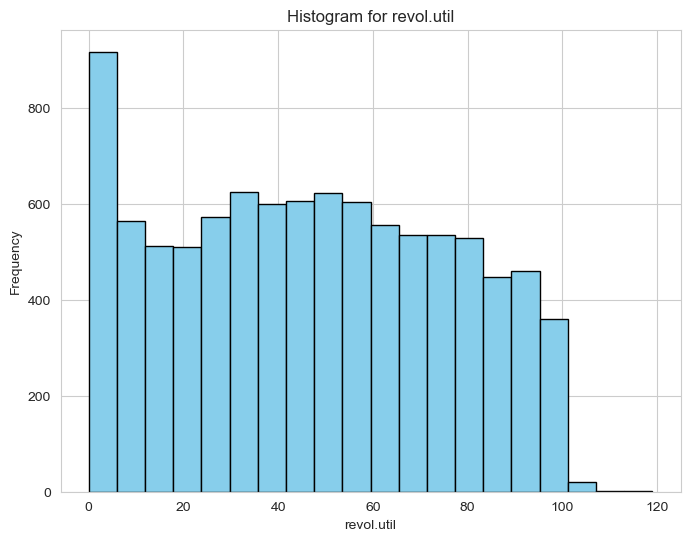

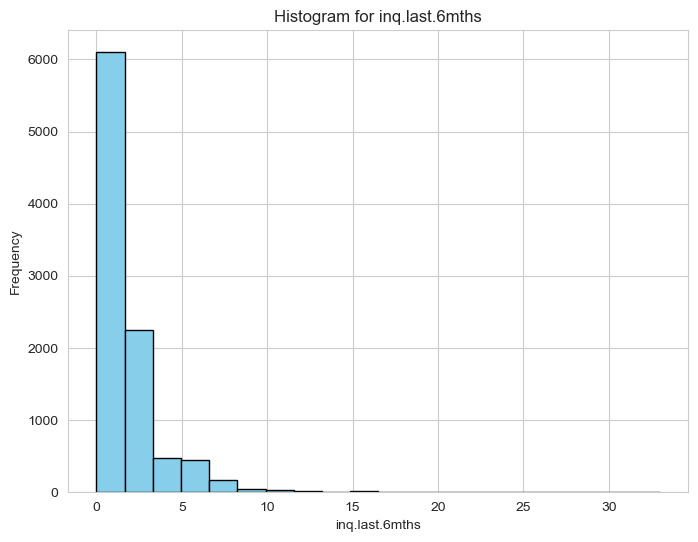

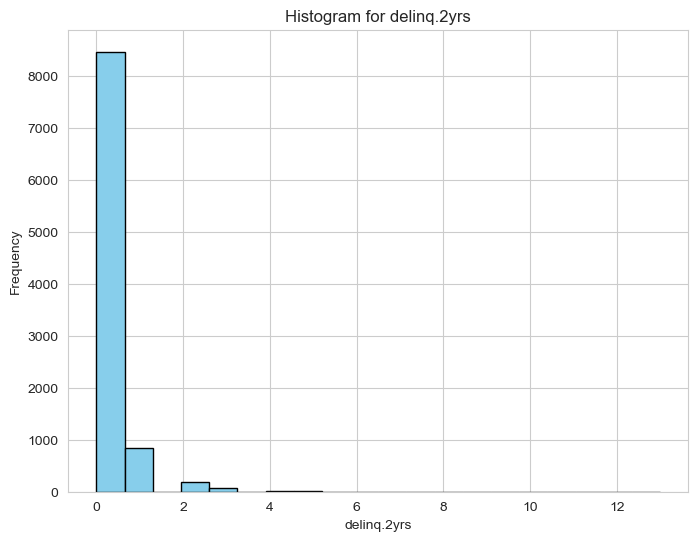

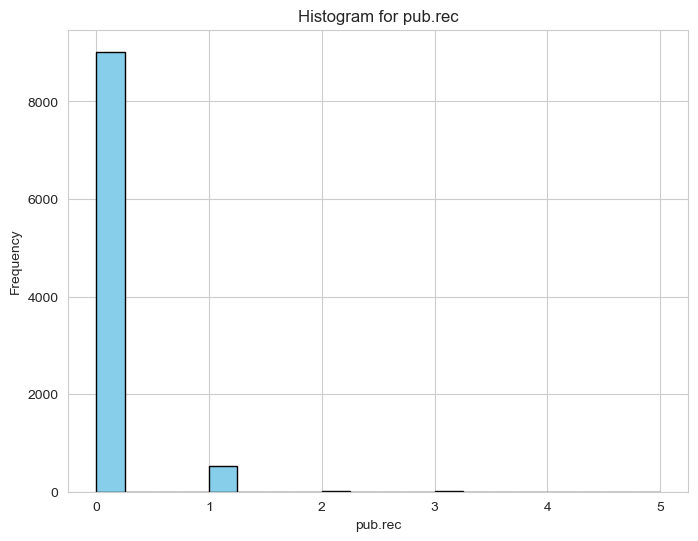

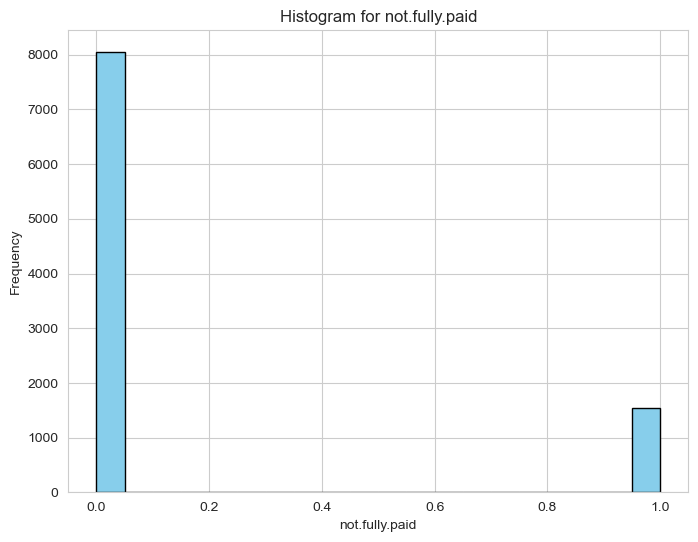

In [44]:
# List of numerical columns (int and float types)
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

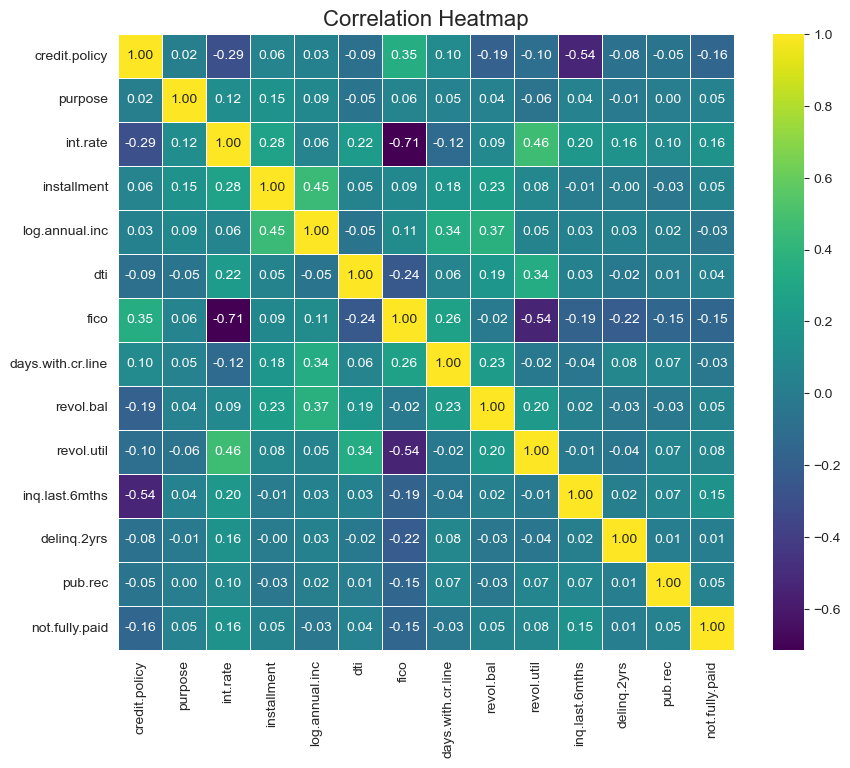

In [71]:

corr = df.corr()

sns.set_style("white")
sns.set_palette("viridis")

plt.figure(figsize=(10, 8))  
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, square=True)

plt.title('Correlation Heatmap', fontsize=16)

#plt.savefig('F:\\Data Science\\First Semister\\Python For Data Science\\Assignment\\Figure\\Correlation Heatmap.jpg', dpi=300)

plt.show()

In [72]:
corr_matrix = df.corr()
print(corr_matrix.round(2))


                   credit.policy  purpose  int.rate  installment  \
credit.policy               1.00     0.02     -0.29         0.06   
purpose                     0.02     1.00      0.12         0.15   
int.rate                   -0.29     0.12      1.00         0.28   
installment                 0.06     0.15      0.28         1.00   
log.annual.inc              0.03     0.09      0.06         0.45   
dti                        -0.09    -0.05      0.22         0.05   
fico                        0.35     0.06     -0.71         0.09   
days.with.cr.line           0.10     0.05     -0.12         0.18   
revol.bal                  -0.19     0.04      0.09         0.23   
revol.util                 -0.10    -0.06      0.46         0.08   
inq.last.6mths             -0.54     0.04      0.20        -0.01   
delinq.2yrs                -0.08    -0.01      0.16        -0.00   
pub.rec                    -0.05     0.00      0.10        -0.03   
not.fully.paid             -0.16     0.05      0

In [74]:
# Extract the correlation values of 'credit.policy' with other variables
credit_policy_corr = corr_matrix['credit.policy']

# Display the correlation values of 'credit.policy' with other variables
print("Correlation of 'credit.policy' with other variables:")
print(credit_policy_corr.round(2))


Correlation of 'credit.policy' with other variables:
credit.policy        1.00
purpose              0.02
int.rate            -0.29
installment          0.06
log.annual.inc       0.03
dti                 -0.09
fico                 0.35
days.with.cr.line    0.10
revol.bal           -0.19
revol.util          -0.10
inq.last.6mths      -0.54
delinq.2yrs         -0.08
pub.rec             -0.05
not.fully.paid      -0.16
Name: credit.policy, dtype: float64


In [49]:
#CHECKING DUPLICATEs AND UNDERSAMPLING

In [50]:
# Count the number of duplicate rows
duplicates = df.duplicated().sum()

# Print the number of duplicate values
print("Number of duplicate values:",duplicates)

Number of duplicate values: 0


In [51]:
df['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [52]:
#DATA IS HIGHLY IMBALANCED

In [53]:
# seprating majority  and minority class
majority=df[df['credit.policy']==1]
minority=df[df['credit.policy']==0]

In [54]:
majority_sample=majority.sample(n=1868)

In [55]:
# concatinate two(2) dataset
new_df=pd.concat([majority_sample,minority],axis=0)

In [56]:
new_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
3415,1,2,0.1158,478.70,10.518673,21.70,712,5382.000000,20680,25.5,0,0,0,1
6685,1,5,0.1426,34.31,11.512925,3.55,742,5940.041667,18435,7.2,2,0,0,0
420,1,2,0.1330,676.78,10.819778,20.42,692,7710.000000,12573,71.8,2,1,0,0
4643,1,2,0.1704,642.14,11.678406,17.74,672,5160.000000,18938,53.8,1,1,0,0
1701,1,2,0.1442,515.74,12.404924,20.01,692,7290.000000,77179,82.5,1,0,0,0


In [57]:
new_df.shape

(3736, 14)

In [58]:
new_df['credit.policy'].value_counts()

credit.policy
1    1868
0    1868
Name: count, dtype: int64

In [59]:
#SPLITTING TARGET VARIABLE

In [60]:
# Split data to be used in the models
# Create matrix of features
x = new_df.drop('credit.policy', axis = 1) # grabs everything else but 'credit.policy'

# Create target variable
y = new_df['credit.policy'] # y is the column we're trying to predict

In [61]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [62]:
y.shape

(3736,)

In [63]:
x.shape

(3736, 13)

In [129]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .10, random_state = 4)

In [130]:
#SETTING MODEL: LOGESTIC REGRESSION

In [131]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

In [132]:
#MODEL EVALUATION

In [133]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 87.7 %


Precision: 0.87
Recall: 0.89
------------------------------------------------------------
[[158  25]
 [ 21 170]]


<Axes: >

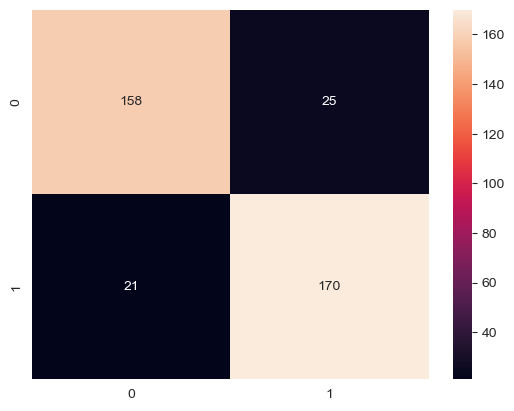

In [134]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

In [135]:
mse = mean_squared_error(y_test, y_pred_log_reg)
print('Mean Squared Error:', mse)

# Calculate Area Under the Curve
auc = roc_auc_score(y_test, y_pred_log_reg)
print('Area Under the Curve:', auc)

Mean Squared Error: 0.12299465240641712
Area Under the Curve: 0.8767201670815093


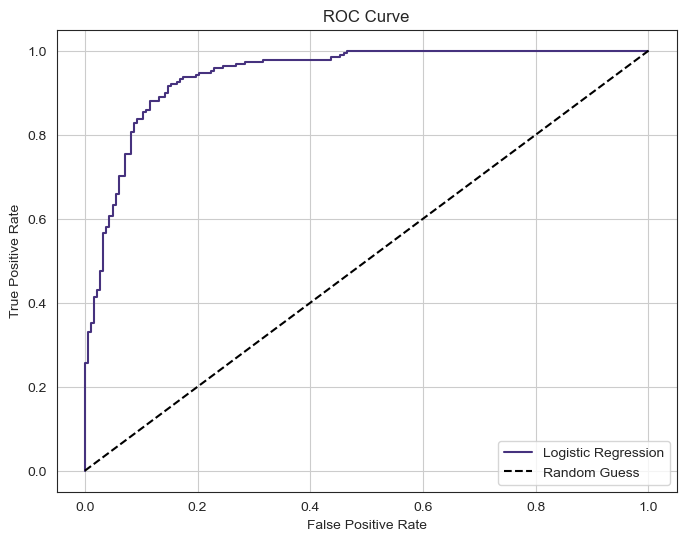

In [137]:
# Get predicted probabilities for the positive class
y_pred_proba = log_reg.predict_proba(x_test)[:,1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
#plt.savefig('F:\\Data Science\\First Semister\\Python For Data Science\\Assignment\\Figure\\ROC Curve', dpi=300)
plt.show()